# 共享单车案例
#### 数据集介绍
背景简介：共享单车系统是租赁自行车的一种方式。使用这些系统，人们可以从一个地方租用自行车，并根据需要将其归还到不同的地方。目前，全世界有超过500个自行车共享系统。在租赁的过程中自行车的行驶时长和路线等信息被完全记录下来，这些特征使得共享单车系统可以转变成一个巨大的表征城市便利性的虚拟感受网络。

任务：利用城市当天的天气、温度、湿度和风速等环境信息对自行车的租借数量进行有效预测，预测每小时内租用的自行车总数。

 


| 特征       	| 说明                                                                                                                                            	|
|------------:	|:-------------------------------------------------------------------------------------------------------------------------------------------------:	|
| datetime   	| 详细到小时的日期+时间戳                                                                                                                               	|
| season     	| 季节              1：春天，     2：夏天，     3：秋天，     4：冬天                                                                             	|
| holiday    	| 是否是公共假期                                                                                                                                  	|
| workingday 	| 是否是工作日（不是周末也不是公共假期）                                                                                                          	|
| weather    	| 天气情况 1：无云，少量云，部分多云     2：雾+多云，雾+云散开，雾+少云，雾     3：小雪，小雨+雷暴+散云，小雨+散云     4：暴雨+冰雹+雷暴+雾，雪+雾 	|
| temp       	| 以摄氏度为单位的温度                                                                                                                            	|
| atemp      	| 以摄氏度为单位的体感温度                                                                                                                        	|
| humidity   	| 相对湿度                                                                                                                                        	|
| windspeed  	| 风速                                                                                                                                            	|
| casual     	| 未注册用户租赁数量                                                                                                                              	|
| registered 	| 注册用户租赁数量                                                                                                                                	|
| count      	| 租赁自行车总数，包括未注册和注册                                                                                                                	|

## 用到一些函数

- DataFrame.isnull()：检查数据是否有缺失值，返回True表示有缺失值，返回False表示没有缺失值。
- DataFrame.corr()：计算数据的相关性矩阵，返回一个矩阵，矩阵中的元素是两两特征之间的相关系数。
- np.log1p()：计算log(1+x)，避免x=0时出现无穷大的情况。
- np.expm1()：计算exp(x)-1。和上面的函数互为反函数

## 其他相关知识

### 多重共线性:
多重共线性（Multicollinearity）是统计学中的一个概念，主要用于描述预测模型中的预测变量之间存在高度相关性的情况。在多元线性回归分析中，如果预测变量之间存在严重的多重共线性，可能会对模型的稳定性和预测准确性产生负面影响。

具体来说，多重共线性可能会导致以下问题：

1. 模型的稳定性和可靠性降低：当预测变量之间存在高度相关性时，模型可能会对数据中的小变化过于敏感，导致模型的稳定性和可靠性降低。

2. 模型解释困难：在存在多重共线性的情况下，很难准确评估每个预测变量对目标变量的影响，因为预测变量之间的高度相关性使得它们的影响难以分离。

3. 参数估计的准确性降低：多重共线性可能会导致预测变量的系数估计值的标准误差增大，从而降低参数估计的准确性。

在实际应用中，我们通常会使用方差膨胀因子（Variance Inflation Factor，VIF）等方法来检测多重共线性。如果检测到预测变量之间存在严重的多重共线性，我们可能需要采取一些措施来处理，例如删除一些高度相关的预测变量，或者使用主成分分析（PCA）等方法进行降维。

---

### 泄露变量:

泄露变量（Leakage Variables）是机器学习中的一个概念，指的是在模型训练过程中不应该使用，但却被误用的数据。这些数据通常包含了关于目标变量的信息，或者是在实际应用中无法获取的数据。

泄露变量的存在会导致模型在训练集上的表现异常好，但在测试集或实际应用中的表现却很差，因为模型可能过度依赖这些在实际应用中无法获取的信息。

例如，在预测疾病的模型中，如果训练数据中包含了病人的死亡日期，那么这个特征就是一个泄露变量，因为在实际应用中，我们无法提前知道病人的死亡日期。

在你的共享单车案例中，**<font color='red'> "casual"（未注册用户租赁数量）和"registered"（注册用户租赁数量）就是泄露变量，因为这两个特征的和等于"count"（租赁自行车总数）</font>**，也就是我们要预测的目标。在实际应用中，我们无法提前知道未来的"casual"和"registered"的值，所以在模型训练时应该排除这两个特征。

---

`datetime`特征在原始形式下通常不直接用于模型训练，原因有两个：

1. `datetime`是一个时间戳，包含了日期和时间的信息，这是一种连续的数据，如果直接使用可能会导致模型难以捕捉到其内在的周期性和趋势。例如，自行车的租赁数量可能在一天中的不同时间（如早高峰和晚高峰）有明显的差异，也可能在一周中的不同天（如工作日和周末）有明显的差异。

2. 大多数机器学习模型都不能直接处理日期时间类型的数据，需要将其转换为数值类型或者类别类型的数据才能进行处理。

因此，通常我们会对`datetime`特征进行预处理，提取出更有意义的信息，如年份、月份、日期、小时等，然后将这些信息作为新的特征用于模型训练。例如，可以将`datetime`转换为以下几个特征：

- `year`：年份
- `month`：月份
- `day`：日期
- `hour`：小时

这样处理后，模型就可以更好地捕捉到数据的周期性和趋势，从而提高预测的准确性。

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
bike_data=pd.read_csv('../../dataset/bike_sharing_demand_train.csv')
bike_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [190]:
# 1:通过isnull统计数据是否存在缺失值
bike_data.isnull().sum() # 无缺失值

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [191]:
# 通过info查看数据类型和
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [192]:
bike_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


plot默认使用线图，可以通过kind参数指定图形类型，线图是一种常见的数据可视化类型，主要用于展示数据随时间或顺序的变化趋势。线图的主要组成部分包括x轴、y轴和线条

线图优点：
- 清晰地展示数据的趋势和模式。
- 可以比较多个数据系列的趋势。
- 可以展示数据的波动和不稳定性。

subplots表示将每个特征的图形分开显示，figsize表示图形的大小



array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

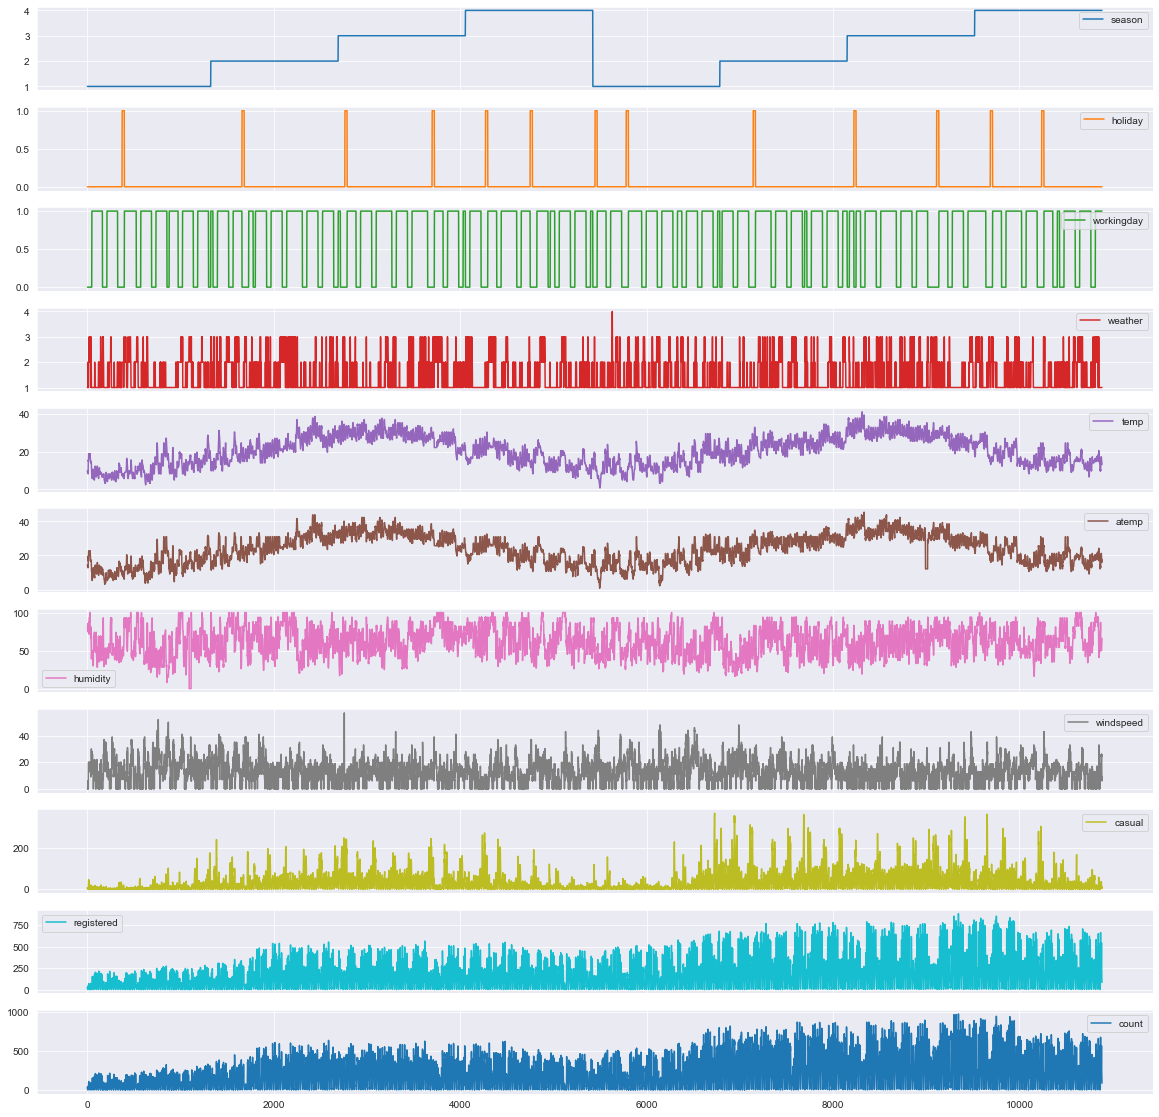

In [193]:

bike_data.plot(subplots=True,figsize=(20,20))

<Axes: >

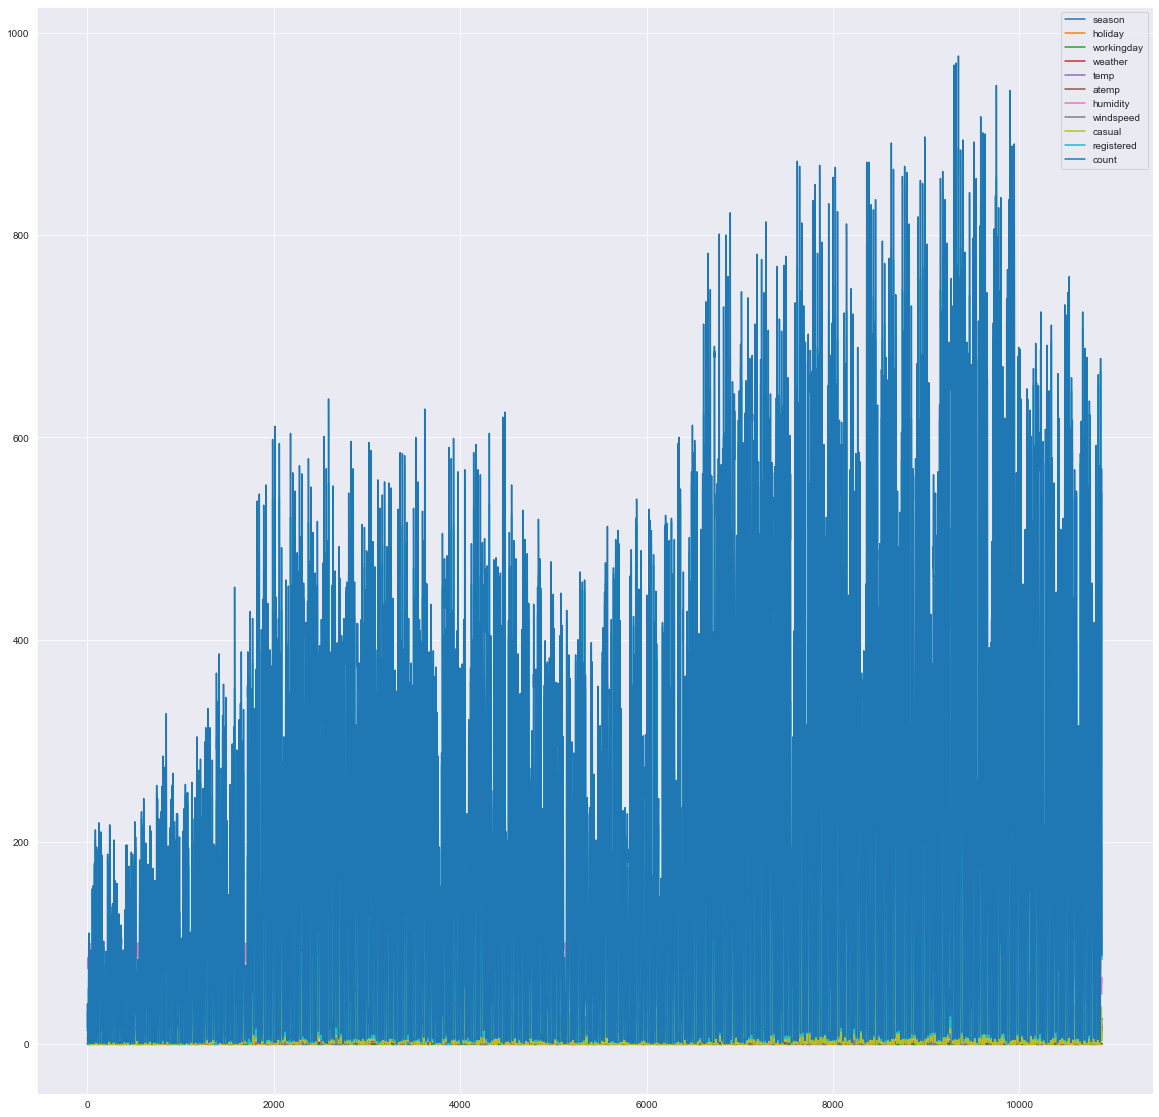

In [194]:
bike_data.plot(subplots=False,figsize=(20,20)) # 数值差异太大，数值小的特征值基本上看不到

## 2.相关性分析

seaborn中的热力图是一个有用的描述两个特征之间关系的方法。在这里我们绘制count versus temp温度，humidity湿度，windspeed风速的相关热力图。

In [195]:
corr_mat=bike_data[['temp','humidity','windspeed','registered','casual','atemp','count']].corr()
corr_mat

,temp,humidity,windspeed,registered,casual,atemp,count
temp,1.000000,-0.064949,-0.017852,0.318571,0.467097,0.984948,0.394454
humidity,-0.064949,1.000000,-0.318607,-0.265458,-0.348187,-0.043536,-0.317371
windspeed,-0.017852,-0.318607,1.000000,0.091052,0.092276,-0.057473,0.101369
registered,0.318571,-0.265458,0.091052,1.000000,0.497250,0.314635,0.970948
casual,0.467097,-0.348187,0.092276,0.497250,1.000000,0.462067,0.690414
atemp,0.984948,-0.043536,-0.057473,0.314635,0.462067,1.000000,0.389784
count,0.394454,-0.317371,0.101369,0.970948,0.690414,0.389784,1.000000


<Axes: >

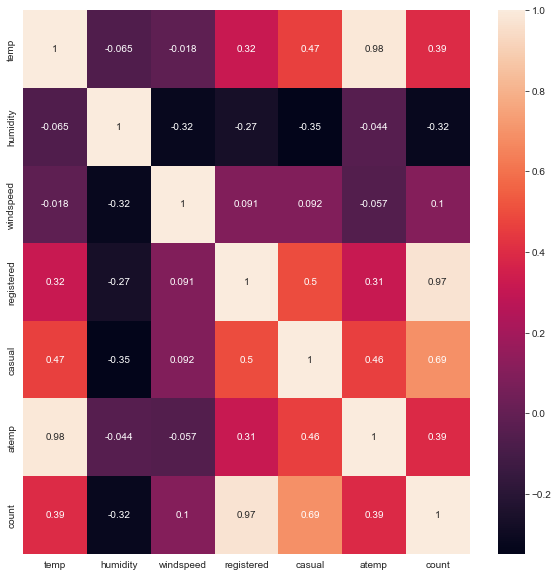

In [196]:
"""
seaborn绘图时候，仍然使用plt来调整画布的大小

从图中可以看出:
- temp和atemp之间的相关性很高，接近1
- count和temp相关性不高，count和humidty相关性不高
- count和windspeed相关性很低，判断为不是真正有用的特征
- atemp将不被采纳，因为atemp和temp彼此之间具有很强的相关性。在模型构建期间，必须删除二者其中一个变量，因为它们将在数据中表现出多重共线性。
- casual未注册用户租赁数量和registered注册用户租赁数量也没有被考虑在内，因为它们本质上是leakage variables泄漏变量(二者相加等于count)，需要在模型构建时丢弃。实际上在kaggle比赛的测试集中，也不会提供这两个特征。

"""

plt.figure(figsize=(10,10))
sns.heatmap(corr_mat,annot=True)

## 3.直接建模
测试一下在不经过预处理和特征工程的情况下，直接建模的效果

In [197]:
drop_features=['datetime','atemp','casual','registered']
X=bike_data.drop(drop_features,axis=1)
X=X.drop('count',axis=1)
y=bike_data['count']
print(X.columns)
print(y.shape)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed'],
      dtype='object')
(10886,)


In [198]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)
print(X_train.shape)
print(X_test.shape)

model=LinearRegression()
model.fit(X_train,y_train)
# 预测
y_pred=model.predict(X_test)
print(type(y_pred))

(7620, 7)
(3266, 7)
<class 'numpy.ndarray'>


In [199]:
# 计算损失
from sklearn.metrics import mean_squared_error
print('RMSE:',mean_squared_error(y_test,y_pred))

RMSE: 24708.424334317064


(2,)


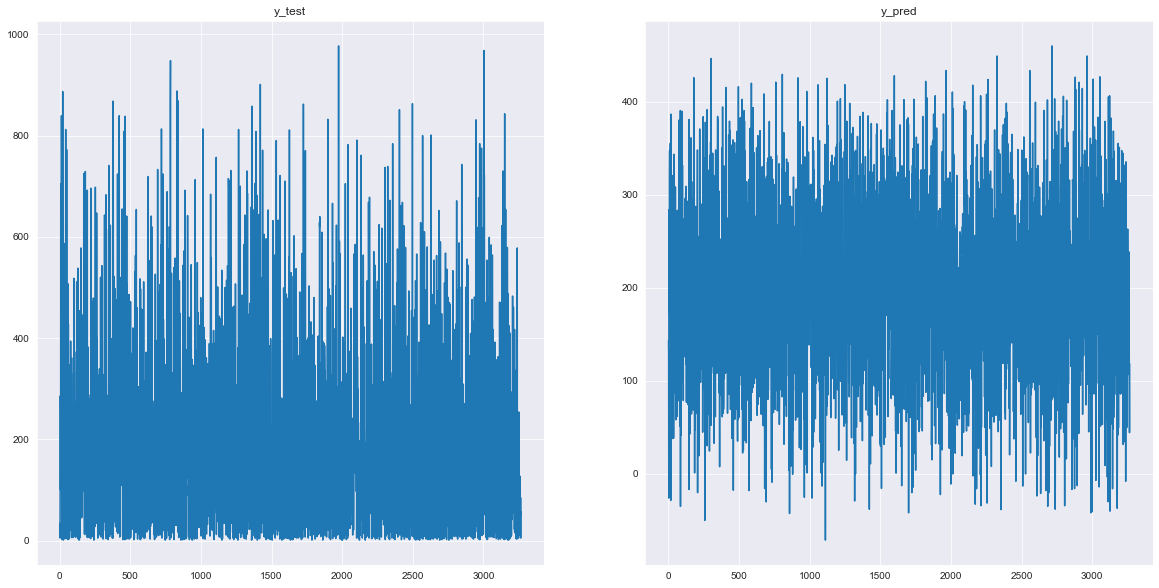

In [200]:
"""
绘制图像来表示预测值和实际值之间的差异,从图中可以看出相差很大，
""" 
fig,ax=plt.subplots(1,2)
print(ax.shape)
fig.set_size_inches(20,10)
ax[0].set_title('y_test')
ax[0].plot(np.array(y_test))
ax[1].set_title('y_pred')
ax[1].plot(y_pred)

RMSE对预测多了和预测少了的惩罚相同，而在共享自行车需求的预测中，欠预测比过预测的损失会更大，预测值应该是不少于真实值，即投放的自行车数量不应少于真实需求的数量，所以惩罚欠预测大于过预测。

Root Mean Squared Logarithmic Error (RMSLE)的公式如下：

$$\sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }$$

其中:

$n$ 是测试集中的小时数

$p_i$ 是预测的自行车租用数量

$a_i$ 是实际的自行车租用数量

$\log(x)$ 是自然对数

RMSLE与RMSE一样越小越好，区别在于RMSLE关注的是比例而不是绝对值，惩罚欠预测大于过预测。

$\log(p_i + 1) - \log(a_i+1)=\displaystyle\log{\frac{p_i+1}{a_i+1}}$

In [201]:
def rmsle(y,y_):
    log1=np.array([np.log1p(v) for v in y ])
    log2=np.array([np.log1p(v) for v in y_])
    calc=(log1-log2)**2
    return np.sqrt(np.mean(calc))

In [202]:
# 利用log1p将训练时的y值转换，构建新的模型，并且重新进行预测，然后计算损失
lmodel=LinearRegression()
lmodel.fit(X_train,np.log1p(y_train))
preds=lmodel.predict(X_test)

# 将预测值转换为正常值
print('RMSLE:',rmsle(y_test,np.expm1(preds)))

RMSLE: 1.2293451803133237


(2,)


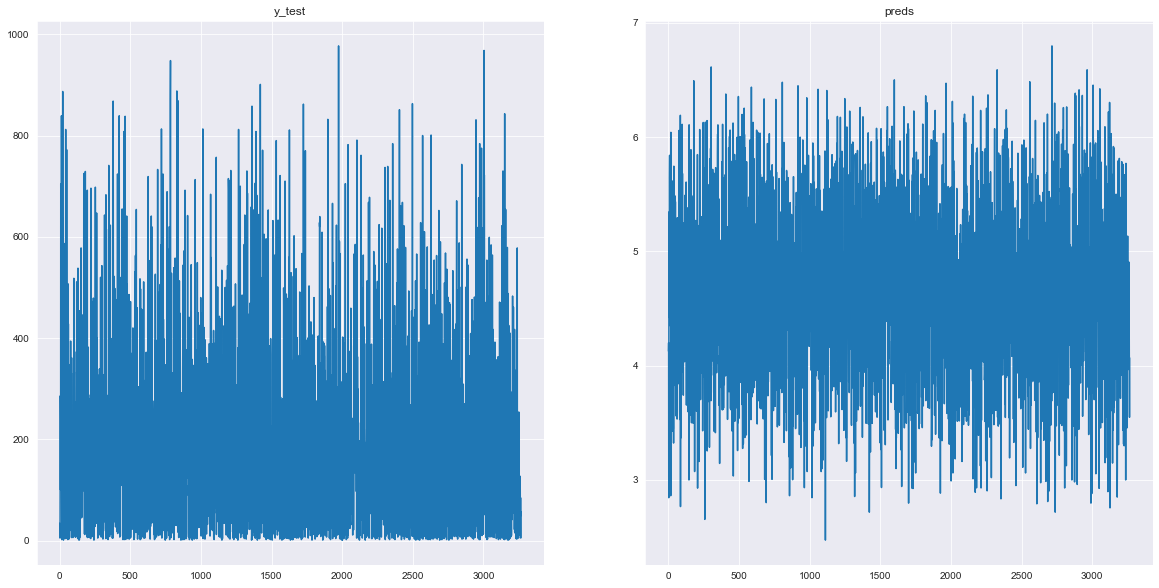

In [203]:
fig,ax=plt.subplots(1,2)
print(ax.shape)
fig.set_size_inches(20,10)
ax[0].set_title('y_test')
ax[0].plot(np.array(y_test))
ax[1].set_title('preds')
ax[1].plot(preds)

## 4.特征工程
1.特征编码
2.构造新特征

正如我们从上面的结果中看到的那样，`season`，`holiday`，`workingday`和`weather`列应该是`categorical`分类数据类型。但是这些列的当前数据类型是`int`。 让我们以下列方式转换数据集，以便我们可以做后续的分析。

 - 从`datetime`列创建新列`date`，`hour`，`weekDay`，`month`。
 - 强制转换`season`，`holiday`，`workingday`和`weather`到`category`类别的数据类型。
 - 将`datetime`列添加到待删除的列中，因为我们已经从中提取了有用的功能。

In [204]:
# 从datetime中提取新的特征，创建新的列
from datetime import datetime
bike_data["date"]=bike_data.datetime.apply(lambda x:x.split()[0])
bike_data['hour']=bike_data.datetime.apply(lambda x:x.split()[1].split(':')[0]).astype('int')
bike_data['year']=bike_data.datetime.apply(lambda x:x.split()[0].split('-')[0])
bike_data['weekday']=bike_data.date.apply(lambda x: datetime.strptime(x,'%Y-%m-%d').weekday())
bike_data['month']=bike_data.date.apply(lambda x:datetime.strptime(x,'%Y-%m-%d').month)

In [205]:
bike_data.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,2011,5,1


In [206]:
# 将分类类型转换成category
category_features=['season','holiday','workingday','weather','weekday','month','year']
for feature in category_features:
    bike_data[feature]=bike_data[feature].astype('category') 

In [207]:
# 查看每列的数据类型
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   datetime    10886 non-null  object  
 1   season      10886 non-null  category
 2   holiday     10886 non-null  category
 3   workingday  10886 non-null  category
 4   weather     10886 non-null  category
 5   temp        10886 non-null  float64 
 6   atemp       10886 non-null  float64 
 7   humidity    10886 non-null  int64   
 8   windspeed   10886 non-null  float64 
 9   casual      10886 non-null  int64   
 10  registered  10886 non-null  int64   
 11  count       10886 non-null  int64   
 12  date        10886 non-null  object  
 13  hour        10886 non-null  int64   
 14  year        10886 non-null  category
 15  weekday     10886 non-null  category
 16  month       10886 non-null  category
dtypes: category(7), float64(3), int64(5), object(2)
memory usage: 926.5+ KB


In [208]:
# 对于离散型分类变量seaborn,weather使用one-hot编码，并且替换原来的列
#  而对于数值型分类变量保持不变
bike_data[['season_original','weather_original']]=bike_data[['season','weather']]
# drop_first=True参数表示在进行one-hot编码后，删除每个分类列的第一个类别。这是为了避免"虚拟变量陷阱"，即在进行线性回归等统计分析时，由于多重共线性导致的问题。
bike_data=pd.get_dummies(bike_data,columns=['season','weather'],drop_first=True)
bike_data.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,weekday,month,season_original,weather_original,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,5,1,1,1,0,0,0,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,5,1,1,1,0,0,0,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,5,1,1,1,0,0,0,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,5,1,1,1,0,0,0,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,5,1,1,1,0,0,0,0,0,0


绘制count vs temp, humidity, and hour  回归图

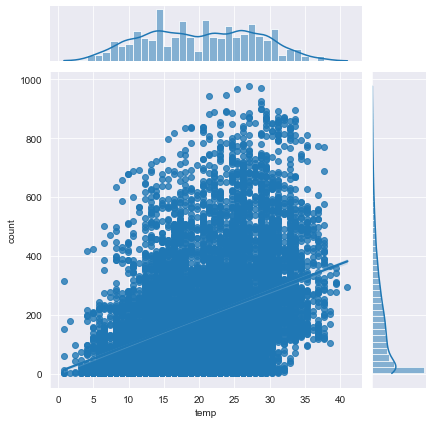

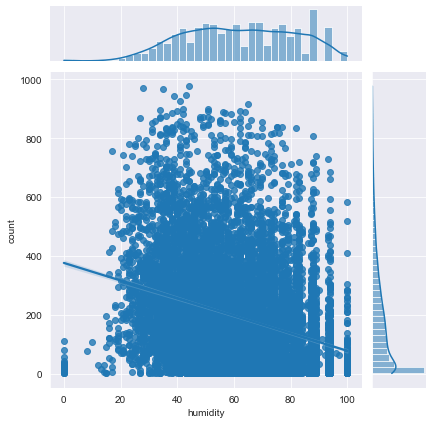

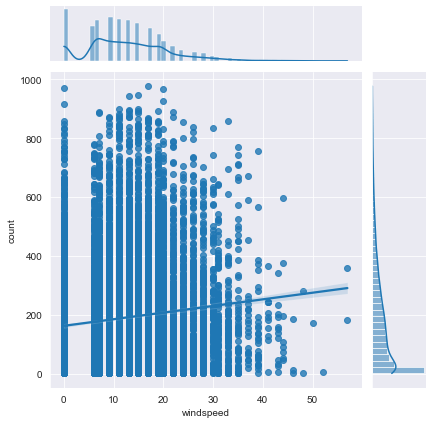

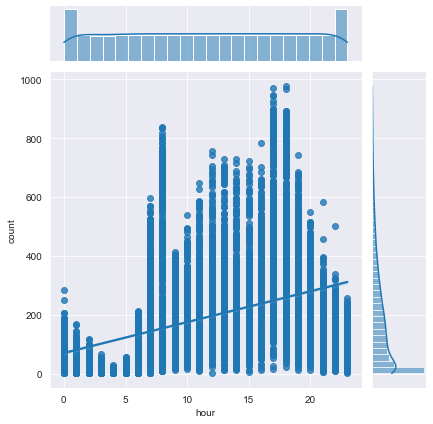

In [209]:
sns.jointplot(x='temp',y='count',data=bike_data,kind='reg')
sns.jointplot(x='humidity',y='count',data=bike_data,kind='reg')
sns.jointplot(x='windspeed',y='count',data=bike_data,kind='reg')
sns.jointplot(x='hour',y='count',data=bike_data,kind='reg')

与count之间存在非线性关系，采用对数变换来构造新的特征

In [210]:
bike_data['log_temp']=np.log1p(bike_data.temp)
bike_data['log_windspeed']=np.log1p(bike_data.windspeed)
bike_data['log_humidity']=np.log1p(bike_data.humidity)
bike_data['log_hour']=np.log1p(bike_data.hour)

In [211]:
# 画图之后感觉相关性也不是很高
# sns.jointplot(x='log_temp',y='count',data=bike_data,kind='reg')
# sns.jointplot(x='log_humidity',y='count',data=bike_data,kind='reg')
# sns.jointplot(x='log_windspeed',y='count',data=bike_data,kind='reg')
# sns.jointplot(x='log_hour',y='count',data=bike_data,kind='reg')

In [212]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   datetime          10886 non-null  object  
 1   holiday           10886 non-null  category
 2   workingday        10886 non-null  category
 3   temp              10886 non-null  float64 
 4   atemp             10886 non-null  float64 
 5   humidity          10886 non-null  int64   
 6   windspeed         10886 non-null  float64 
 7   casual            10886 non-null  int64   
 8   registered        10886 non-null  int64   
 9   count             10886 non-null  int64   
 10  date              10886 non-null  object  
 11  hour              10886 non-null  int64   
 12  year              10886 non-null  category
 13  weekday           10886 non-null  category
 14  month             10886 non-null  category
 15  season_original   10886 non-null  category
 16  weather_original  1088

## 5异常值检测和处理

(2, 2)


<Axes: xlabel='workingday', ylabel='count'>

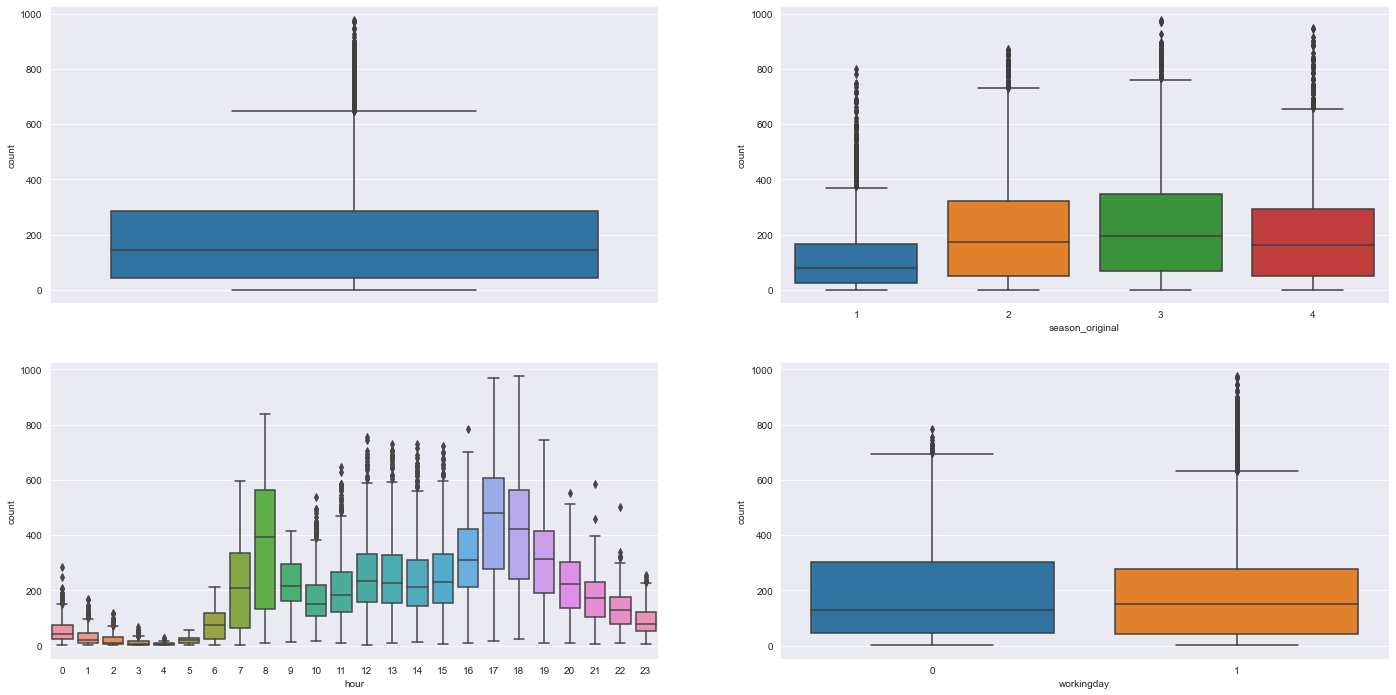

In [213]:
fig, axes=plt.subplots(2,2)
print(axes.shape)
fig.set_size_inches(24,12)
sns.boxplot(data=bike_data,y='count',ax=axes[0][0])
sns.boxplot(data=bike_data,y='count',x='season_original',ax=axes[0][1])
sns.boxplot(data=bike_data,y='count',x='hour',ax=axes[1][0])
sns.boxplot(data=bike_data,y='count',x='workingday',ax=axes[1][1])

初看起来，`count`变量包含许多异常值数据点，这些数据点的分布右偏（因为超出外部四分位数限制的数据点更多）。除此之外，还可以从给出的下面的箱图做出以下推断：
- 1.春季用车数量相对较少，这点从箱形图中位数较低可以看出来。
- 2.`Hour Of The Day`的箱线图很有意思。中位数的值在早上7点-早上8点和下午5点 - 下午6点相对较高。它可以归因于这些时间段的上学的人和上班族。
- 3.从下图中可以清楚地看出，大多数离群值主要来自`Working Day`工作日而不是`Non Working Day`非工作日。

In [214]:
# 删除计数列中count的异常值
# 去掉相关列和无用列
drop_features=['datetime','date','atemp','casual','registered','count','season_original','weather_original']

X=bike_data.copy().drop(drop_features,axis=1)
y=bike_data['count']

print(X.info())
# 划分训练集和测试集
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   holiday        10886 non-null  category
 1   workingday     10886 non-null  category
 2   temp           10886 non-null  float64 
 3   humidity       10886 non-null  int64   
 4   windspeed      10886 non-null  float64 
 5   hour           10886 non-null  int64   
 6   year           10886 non-null  category
 7   weekday        10886 non-null  category
 8   month          10886 non-null  category
 9   season_2       10886 non-null  uint8   
 10  season_3       10886 non-null  uint8   
 11  season_4       10886 non-null  uint8   
 12  weather_2      10886 non-null  uint8   
 13  weather_3      10886 non-null  uint8   
 14  weather_4      10886 non-null  uint8   
 15  log_temp       10886 non-null  float64 
 16  log_windspeed  10886 non-null  float64 
 17  log_humidity   10886 non-null  

In [215]:
data=pd.concat([X_train,y_train],axis=1)
data.head()

,holiday,workingday,temp,humidity,windspeed,hour,year,weekday,month,season_2,season_3,season_4,weather_2,weather_3,weather_4,log_temp,log_windspeed,log_humidity,log_hour,count
10845,0,1,14.76,93,8.9981,7,2012,1,12,0,0,1,0,0,0,2.757475,2.302395,4.543295,2.079442,355
5471,0,1,7.38,51,16.9979,2,2012,1,1,0,0,0,0,0,0,2.125848,2.890255,3.951244,1.098612,3
4636,0,0,10.66,81,6.0032,6,2011,6,11,0,0,1,0,0,0,2.456164,1.946367,4.406719,1.945910,16
1808,0,1,18.04,88,7.0015,6,2011,0,5,1,0,0,0,0,0,2.946542,2.079629,4.488636,1.945910,62
2377,0,1,26.24,69,6.0032,23,2011,0,6,1,0,0,0,0,0,3.304686,1.946367,4.248495,3.178054,60


In [216]:
# 去掉异常值
print(data.shape)
mean=y_train.mean()
std=y_train.std()
data=data[np.abs(data['count']-mean)<=3*std]  # 3倍标准差之外的数据认为是异常值，进行去除，将
print(data.shape)

(7620, 20)
(7516, 20)


## 6.数值特征标准化

In [217]:
numerialFeature=['temp','windspeed','humidity','hour']

In [218]:
data.describe()

,temp,humidity,windspeed,hour,season_2,season_3,season_4,weather_2,weather_3,weather_4,log_temp,log_windspeed,log_humidity,log_hour,count
count,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000
mean,20.052578,62.059340,12.815914,11.564662,0.250133,0.244013,0.255322,0.257318,0.080362,0.000133,2.966009,2.332772,4.086659,2.287755,183.169505
std,7.787637,19.171425,8.169292,6.935148,0.433118,0.429529,0.436071,0.437185,0.271871,0.011535,0.425886,0.947878,0.379715,0.815563,166.535131
min,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.598837,0.000000,0.000000,0.000000,1.000000
25%,13.940000,47.000000,7.001500,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.704042,2.079629,3.871201,1.945910,41.000000
50%,20.500000,62.000000,12.998000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.068053,2.638914,4.143135,2.564949,142.500000
75%,26.240000,78.000000,16.997900,18.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.304686,2.890255,4.369448,2.944439,277.000000
max,41.000000,100.000000,56.996900,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.737670,4.060390,4.615121,3.178054,734.000000


In [219]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(data[numerialFeature])
data[numerialFeature]=scalar.transform(data[numerialFeature])
data.describe()

,temp,humidity,windspeed,hour,season_2,season_3,season_4,weather_2,weather_3,weather_4,log_temp,log_windspeed,log_humidity,log_hour,count
count,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000,7516.000000
mean,0.478660,0.620593,0.224853,0.502811,0.250133,0.244013,0.255322,0.257318,0.080362,0.000133,2.966009,2.332772,4.086659,2.287755,183.169505
std,0.193819,0.191714,0.143329,0.301528,0.433118,0.429529,0.436071,0.437185,0.271871,0.011535,0.425886,0.947878,0.379715,0.815563,166.535131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.598837,0.000000,0.000000,0.000000,1.000000
25%,0.326531,0.470000,0.122840,0.260870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.704042,2.079629,3.871201,1.945910,41.000000
50%,0.489796,0.620000,0.228047,0.521739,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.068053,2.638914,4.143135,2.564949,142.500000
75%,0.632653,0.780000,0.298225,0.782609,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.304686,2.890255,4.369448,2.944439,277.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.737670,4.060390,4.615121,3.178054,734.000000


## 7.重新建模

In [220]:
data_test=pd.concat([X_test,y_test],axis=1)
data_test[numerialFeature]=scalar.transform(data_test[numerialFeature])

X_train=data.drop(['count'],axis=1)
y_train=data['count']
X_test=data_test.drop(['count'],axis=1)
y_test=data_test['count']

In [221]:
model=LinearRegression()
model.fit(X_train,np.log1p(y_train))
preds=model.predict(X_test)

TypeError: can't multiply sequence by non-int of type 'float'

In [222]:
print(preds)
print(rmsle(y_test,np.expm1(preds)))

[4.12658991 4.19939142 2.84457924 ... 3.93472824 3.54798169 4.06777435]
1.2293451803133237
